In [ ]:
!unzip '/content/SCUT-FBP5500_v2.1.zip'

Streaming output truncated to the last 5000 lines.
  inflating: SCUT-FBP5500_v2/Images/AF382.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF401.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF503.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF515.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF529.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF55.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF620.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF633.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF635.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF64.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF67.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF699.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF746.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF747.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF764.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF768.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF781.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF796.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF81.jpg  
  inflating: SCUT-FBP5500_v2/Images/AF148

Model

In [ ]:
!pip install torch torchvision torchaudio  # match your CUDA or CPU build
!pip install timm facenet-pytorch pandas scikit-learn pillow matplotlib tqdm huggingface_hub gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 798.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 115.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 489.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12

In [ ]:
import pandas as pd
import cv2
import os

CSV_PATH = "/content/score_sheet.csv"
IMG_DIR = "/content/SCUT-FBP5500_v2"

df = pd.read_csv(CSV_PATH)

print(df.head())
print("Total images:", len(df))


     Filename     Score                                   full_path
0     AF1.jpg  2.333333     /content/SCUT-FBP5500_v2/Images/AF1.jpg
1    AF10.jpg  3.433333    /content/SCUT-FBP5500_v2/Images/AF10.jpg
2   AF100.jpg  2.900000   /content/SCUT-FBP5500_v2/Images/AF100.jpg
3  AF1000.jpg  3.966667  /content/SCUT-FBP5500_v2/Images/AF1000.jpg
4  AF1001.jpg  3.733333  /content/SCUT-FBP5500_v2/Images/AF1001.jpg
Total images: 5500


(-0.5, 349.5, 349.5, -0.5)

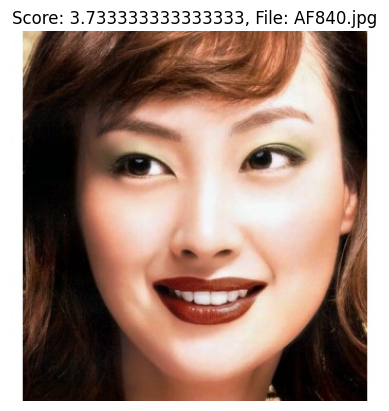

In [ ]:
import random
import matplotlib.pyplot as plt

row = df.sample(1).iloc[0]
img_path = row['full_path']

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title(f"Score: {row['Score']}, File: {row['Filename']}")
plt.axis('off')


In [ ]:
IMG_SIZE = 224

def preprocess_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    return img


(-0.5, 223.5, 223.5, -0.5)

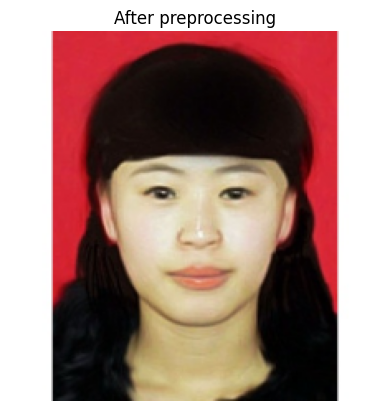

In [ ]:
test_path = df.iloc[0]['full_path']
test_img = preprocess_image(test_path)

plt.imshow(test_img)
plt.title("After preprocessing")
plt.axis('off')


In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)
train_df.shape, val_df.shape


((4950, 3), (550, 3))

In [ ]:
import torch
from torch.utils.data import Dataset

class FaceDataset(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img = preprocess_image(row['full_path'])
        img = torch.tensor(img, dtype=torch.float32).permute(2,0,1)
        label = torch.tensor(row['Score'], dtype=torch.float32)
        return img, label


In [ ]:
from torch.utils.data import DataLoader

train_ds = FaceDataset(train_df)
train_loader = DataLoader(train_ds, batch_size=4, shuffle=True)

images, labels = next(iter(train_loader))

print(images.shape)   # Expected: [4, 3, 224, 224]
print(labels)


torch.Size([4, 3, 224, 224])
tensor([2.7500, 3.4167, 3.6667, 2.5500])


In [ ]:
import torch.nn as nn
from torchvision.models import efficientnet_v2_s, EfficientNet_V2_S_Weights

weights = EfficientNet_V2_S_Weights.IMAGENET1K_V1

modelA = efficientnet_v2_s(weights=weights)
modelA.classifier = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(1280, 1)   # predicting 1 score
)


Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:01<00:00, 48.1MB/s]


In [ ]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(modelA.parameters(), lr=1e-4)

device = "cuda" if torch.cuda.is_available() else "cpu"
modelA.to(device)

EPOCHS = 5

for epoch in range(EPOCHS):
    modelA.train()
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device).unsqueeze(1)

        preds = modelA(imgs)
        loss = criterion(preds, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1} Loss: {loss.item()}")


In [ ]:
modelA.eval()
path = df.iloc[10]['full_path']
img = preprocess_image(path)
tensor = torch.tensor(img).permute(2,0,1).unsqueeze(0).float().to(device)

with torch.no_grad():
    pred = modelA(tensor).item()

pred


In [ ]:
torch.save(modelA.state_dict(), "modelA_weights.pt")
print("Saved to modelA_weights.pt")


In [ ]:
df["Score"][10]

In [ ]:
import os, math, random, time
import numpy as np
import pandas as pd
from tqdm import tqdm
import cv2
import mediapipe as mp
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

print("mediapipe:", mp.__version__)
print("torch:", torch.__version__)

In [ ]:
# Cell 1: I/O helpers
def load_image_rgb(path, resize_to=None):
    img = cv2.imread(path)
    if img is None:
        raise FileNotFoundError(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if resize_to is not None:
        img = cv2.resize(img, resize_to)
    return img

def show_image(img, title=None):
    plt.figure(figsize=(4,4))
    plt.imshow(img)
    if title: plt.title(title)
    plt.axis('off')
    plt.show()


In [ ]:
# TEST 1: load and show one image (set path to an example)
EXAMPLE_IMG = "/content/SCUT-FBP5500_v2/Images/AF1.jpg"  # change path
if os.path.exists(EXAMPLE_IMG):
    im = load_image_rgb(EXAMPLE_IMG, resize_to=(400,400))
    show_image(im, "Sample image")
else:
    print("Place an example image at:", EXAMPLE_IMG)


In [ ]:
# Cell 2: MediaPipe FaceMesh wrapper
mp_face = mp.solutions.face_mesh

face_mesh = mp_face.FaceMesh(static_image_mode=True,
                             max_num_faces=1,
                             refine_landmarks=True,
                             min_detection_confidence=0.5)

def extract_landmarks(image_rgb):
    """
    image_rgb: numpy array HxWx3, RGB
    returns: list of (x, y, z) landmarks scaled to image coords, or None if not detected
    """
    h, w, _ = image_rgb.shape
    results = face_mesh.process(image_rgb)
    if not results.multi_face_landmarks:
        return None
    lm = results.multi_face_landmarks[0]
    pts = []
    for p in lm.landmark:
        pts.append((int(p.x * w), int(p.y * h), float(p.z)))
    return np.array(pts)  # shape (468, 3)

def draw_landmarks(image_rgb, landmarks, radius=1):
    img = image_rgb.copy()
    if landmarks is None:
        return img
    for (x, y, z) in landmarks:
        cv2.circle(img, (int(x), int(y)), radius, (0,255,0), -1)
    return img


In [ ]:
# TEST 2: extract and draw landmarks
if os.path.exists(EXAMPLE_IMG):
    img = load_image_rgb(EXAMPLE_IMG, resize_to=(640,640))
    lms = extract_landmarks(img)
    print("Landmarks found:", None if lms is None else lms.shape)
    drawn = draw_landmarks(img, lms, radius=1)
    show_image(drawn, "Landmarks overlay")
else:
    print("Place example image at", EXAMPLE_IMG)


In [ ]:
# Cell 3: Feature engineering helpers

# Useful landmark groups (MediaPipe indices)
# (these indices are standard for MP face mesh -- I've selected robust representative points)
LEFT_EYE_IDX = [33, 133, 160, 159, 158, 153, 246]   # outer/inner eye contour / eyelids
RIGHT_EYE_IDX = [263, 362, 387, 386, 385, 380, 466]

LIP_UP_IDX = [61, 185, 40, 39, 37]   # top lip
LIP_DOWN_IDX = [291, 405, 375, 321, 178]  # bottom lip
MOUTH_LEFT = 61
MOUTH_RIGHT = 291
UPPER_LIP_CENTER = 13
LOWER_LIP_CENTER = 14

NOSE_LEFT = 98
NOSE_RIGHT = 327
NOSE_TIP = 1
NOSE_TOP = 6

JAWLINE_IDX = list(range(127, 136)) + list(range(234, 243))  # sample jawline points
CHEEK_LEFT = 50
CHEEK_RIGHT = 280

def euclid(a, b):
    return np.linalg.norm(np.array(a[:2]) - np.array(b[:2]))

def normalize_by_face_width(val, face_width):
    # map value / face_width into (0..inf) then scale; caller will clamp
    return val / (face_width + 1e-8)

def face_width_from_landmarks(lm):
    # approximate face width: distance between left-most and right-most landmarks
    xs = lm[:,0]
    left = np.min(xs)
    right = np.max(xs)
    return right - left

def eye_openness(landmarks, eye_idx):
    # compute vertical distance between averaged upper eyelid pts and lower eyelid pts
    try:
        pts = landmarks[eye_idx][:,:2]
        # choose two upper and two lower points approximations
        upper = np.mean(pts[[1,2]], axis=0)
        lower = np.mean(pts[[4,5]], axis=0)
        horiz = np.mean(pts[[0,6]], axis=0)
        vert = np.linalg.norm(upper - lower)
        hor = np.linalg.norm(horiz - pts[3])
        return vert, hor
    except Exception:
        return 0.0, 1.0

def eye_aspect_ratio(landmarks, eye_idx):
    # simplified EAR: vertical/horizontal ratio
    v, h = eye_openness(landmarks, eye_idx)
    if h == 0: return 0.0
    return v / (h + 1e-8)

def mouth_width(landmarks):
    try:
        return euclid(landmarks[MOUTH_LEFT], landmarks[MOUTH_RIGHT])
    except:
        return 0.0

def lip_thickness(landmarks):
    try:
        up = landmarks[UPPER_LIP_CENTER]
        down = landmarks[LOWER_LIP_CENTER]
        return euclid(up, down)
    except:
        return 0.0

def nose_width(landmarks):
    try:
        left = landmarks[NOSE_LEFT]
        right = landmarks[NOSE_RIGHT]
        return euclid(left, right)
    except:
        return 0.0

def jawline_curvature(landmarks):
    # measure variance of angles along sampled jawline points
    try:
        pts = landmarks[JAWLINE_IDX][:,:2]
        # compute angles between triplets
        angles = []
        for i in range(1, len(pts)-1):
            a = pts[i-1]; b = pts[i]; c = pts[i+1]
            v1 = a - b; v2 = c - b
            # angle
            cosang = np.dot(v1, v2) / (np.linalg.norm(v1)*np.linalg.norm(v2) + 1e-8)
            angles.append(np.arccos(np.clip(cosang, -1, 1)))
        return np.std(angles)
    except:
        return 0.0

def cheek_prominence(landmarks):
    # vertical distance from cheek point to nose-midline at same y
    try:
        left = landmarks[CHEEK_LEFT][:2]
        right = landmarks[CHEEK_RIGHT][:2]
        nose = landmarks[NOSE_TIP][:2]
        # cheek distances to nose x
        return abs(left[0]-nose[0]) + abs(right[0]-nose[0])
    except:
        return 0.0

def skin_sharpness(image_rgb, landmarks):
    # Use Laplacian variance in cheek regions as proxy (higher variance -> more texture -> potentially better skin quality)
    h,w,_ = image_rgb.shape
    try:
        lx, ly = landmarks[CHEEK_LEFT][:2].astype(int)
        rx, ry = landmarks[CHEEK_RIGHT][:2].astype(int)
        # small patches around cheeks
        size = max(8, int(min(w,h)*0.05))
        left_patch = image_rgb[max(0,ly-size):min(h,ly+size), max(0,lx-size):min(w,lx+size)]
        right_patch = image_rgb[max(0,ry-size):min(h,ry+size), max(0,rx-size):min(w,rx+size)]
        def lap_var(p):
            if p.size == 0: return 0.0
            gray = cv2.cvtColor(p, cv2.COLOR_RGB2GRAY)
            return cv2.Laplacian(gray, cv2.CV_64F).var()
        return (lap_var(left_patch) + lap_var(right_patch)) / 2.0
    except:
        return 0.0

def build_feature_vector(image_rgb, landmarks):
    """
    Returns a feature vector (numpy) of engineered features.
    Order:
      [left_eye_ear, right_eye_ear, eye_symmetry, mouth_width_norm, lip_thickness_norm,
       nose_width_norm, jaw_curv_norm, cheek_prominence_norm, skin_sharpness_norm, face_width]
    and additional raw stats so vector length ~ 12-20
    """
    if landmarks is None:
        # return zeros vector
        return np.zeros(12, dtype=np.float32)

    fw = face_width_from_landmarks(landmarks) + 1e-8
    # eyes
    left_ear = eye_aspect_ratio(landmarks, LEFT_EYE_IDX)
    right_ear = eye_aspect_ratio(landmarks, RIGHT_EYE_IDX)
    eye_sym = abs(left_ear - right_ear)

    mw = mouth_width(landmarks)
    lt = lip_thickness(landmarks)
    nw = nose_width(landmarks)
    jc = jawline_curvature(landmarks)
    cp = cheek_prominence(landmarks)
    ss = skin_sharpness(image_rgb, landmarks)

    # normalize by face width where sensible
    mw_n = normalize_by_face_width(mw, fw)
    lt_n = normalize_by_face_width(lt, fw)
    nw_n = normalize_by_face_width(nw, fw)
    cp_n = normalize_by_face_width(cp, fw)
    jc_n = jc  # angle variance is scale invariant-ish
    ss_n = ss  # we'll normalize across dataset later

    vec = np.array([left_ear, right_ear, eye_sym, mw_n, lt_n, nw_n, jc_n, cp_n, ss_n, fw], dtype=np.float32)
    return vec


In [ ]:
# TEST 3: run feature extraction on example image
if os.path.exists(EXAMPLE_IMG):
    img = load_image_rgb(EXAMPLE_IMG, resize_to=(640,640))
    lms = extract_landmarks(img)
    feats = build_feature_vector(img, lms)
    print("Feature vector length:", feats.shape[0])
    print("Feature values:", feats)
else:
    print("Put an example image at", EXAMPLE_IMG)


In [ ]:
# Cell 4: compute features for entire dataset (or subset)
CSV_PATH = "/content/score_sheet.csv"   # update path
MAX_SAMPLES = None   # set to e.g., 200 for quick runs; None for full dataset

df = pd.read_csv(CSV_PATH)
if MAX_SAMPLES:
    df = df.sample(min(MAX_SAMPLES, len(df)), random_state=42).reset_index(drop=True)

features_list = []
meta_rows = []
failed = 0

print("Processing", len(df), "images for feature extraction...")
for i, row in tqdm(df.iterrows(), total=len(df)):
    p = row['full_path']
    try:
        img = load_image_rgb(p, resize_to=(640,640))
    except Exception as e:
        # skip if file missing
        failed += 1
        features_list.append(np.zeros(12, dtype=np.float32))
        meta_rows.append({'path': p, 'score': row.get('Score', np.nan), 'ok': False})
        continue
    lms = extract_landmarks(img)
    feats = build_feature_vector(img, lms)
    features_list.append(feats)
    meta_rows.append({'path': p, 'score': row.get('Score', np.nan), 'ok': True})

features_arr = np.stack(features_list, axis=0)  # (N, F)
meta_df = pd.DataFrame(meta_rows)
print("Done. Failed detections:", failed)
print("Features array shape:", features_arr.shape)

# Save cached features (optional)
np.save("features_cache.npy", features_arr)
meta_df.to_csv("meta_features.csv", index=False)
print("Saved features_cache.npy and meta_features.csv")


In [ ]:
# TEST 4: quick sanity prints
arr = np.load("features_cache.npy")
print("Min, max per feature:", arr.min(axis=0), arr.max(axis=0))
print("First row:", arr[0])
print(pd.read_csv("meta_features.csv").head())


In [ ]:
# Cell 5: normalization + PyTorch Dataset
features = np.load("features_cache.npy")
meta = pd.read_csv("meta_features.csv")
scores = meta['score'].fillna(meta['score'].mean()).values.astype(np.float32)

# compute normalization (mean/std)
feat_mean = features.mean(axis=0)
feat_std = features.std(axis=0) + 1e-8
print("Feature mean:", feat_mean)
print("Feature std:", feat_std)

features_norm = (features - feat_mean) / feat_std

# Save normalization params
np.save("feat_mean.npy", feat_mean)
np.save("feat_std.npy", feat_std)

# Dataset
class FeaturesDataset(Dataset):
    def __init__(self, features_norm, scores):
        self.X = features_norm.astype(np.float32)
        self.y = scores.astype(np.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.from_numpy(self.X[idx]), torch.tensor(self.y[idx], dtype=torch.float32)

# Test dataset
ds = FeaturesDataset(features_norm, scores)
print("Dataset size:", len(ds))
x,y = ds[0]
print("x shape:", x.shape, "y:", y)


In [ ]:
# Cell 6: Model B architecture
class ModelB(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, n_sub=6):
        super().__init__()
        self.n_sub = n_sub
        self.mlp = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim//2),
            nn.ReLU(),
            nn.Linear(hidden_dim//2, n_sub)  # raw logits for sub-scores
        )
        # learnable combination weights (logits) will be turned into softmax to be positive and sum to 1
        self.comb_logits = nn.Parameter(torch.zeros(n_sub))

    def forward(self, x):
        # x: (B, in_dim)
        raw = self.mlp(x)  # (B, n_sub)
        # map to 1..5: sigmoid -> 0..1 -> *4 -> +1
        sub_scores = torch.sigmoid(raw) * 4.0 + 1.0  # range [1,5]
        weights = torch.softmax(self.comb_logits, dim=0)  # (n_sub,)
        overall = (sub_scores * weights.unsqueeze(0)).sum(dim=1)  # (B,)
        return overall, sub_scores, weights

# quick instantiation test
in_dim = features_norm.shape[1]
modelB = ModelB(in_dim=in_dim, hidden_dim=128, n_sub=6)
print(modelB)


In [ ]:
# TEST 6: forward pass
sample_x = torch.from_numpy(features_norm[:4])
overall_pred, sub_scores_pred, weights = modelB(sample_x)
print("overall_pred shape:", overall_pred.shape)
print("sub_scores_pred shape:", sub_scores_pred.shape)
print("weights:", weights.detach().numpy())
print("example sub-scores:", sub_scores_pred[0].detach().numpy())


In [ ]:
# Cell 7: train/test split and training loop
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(features_norm, scores, test_size=0.12, random_state=42)

train_ds = FeaturesDataset(X_train, y_train)
val_ds   = FeaturesDataset(X_val, y_val)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=64, shuffle=False)

device = "cuda" if torch.cuda.is_available() else "cpu"
modelB = ModelB(in_dim=in_dim, hidden_dim=128, n_sub=6).to(device)
optimizer = torch.optim.Adam(modelB.parameters(), lr=1e-3, weight_decay=1e-5)
criterion = nn.MSELoss()

def eval_model(model, loader):
    model.eval()
    preds=[]; trues=[]
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device).float()
            yb = yb.to(device).float()
            overall_pred, sub_scores, weights = model(xb)
            preds.extend(overall_pred.detach().cpu().numpy().tolist())
            trues.extend(yb.detach().cpu().numpy().tolist())
    preds = np.array(preds); trues = np.array(trues)
    mae = np.mean(np.abs(preds - trues))
    rmse = np.sqrt(np.mean((preds - trues)**2))
    return dict(mae=mae, rmse=rmse)

# Quick test-train: 3 epochs (or set epochs=1 for quick smoke)
EPOCHS = 5
for epoch in range(1, EPOCHS+1):
    modelB.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        xb = xb.to(device).float()
        yb = yb.to(device).float()
        optimizer.zero_grad()
        overall_pred, sub_scores, weights = modelB(xb)
        loss = criterion(overall_pred, yb)
        # optional mild regularizer to keep sub-scores from saturating
        loss_reg = 1e-3 * torch.mean((sub_scores - 3.0)**2)  # prefer middle values slightly
        total_loss = loss + loss_reg
        total_loss.backward()
        optimizer.step()
        running_loss += total_loss.item() * xb.size(0)
    running_loss /= len(train_loader.dataset)
    val_metrics = eval_model(modelB, val_loader)
    print(f"Epoch {epoch}/{EPOCHS} train_loss: {running_loss:.4f} | val_mae: {val_metrics['mae']:.4f} val_rmse: {val_metrics['rmse']:.4f}")


In [ ]:
# Cell 8: inference helper
# load normalization params if needed
feat_mean = np.load("feat_mean.npy")
feat_std = np.load("feat_std.npy")

def infer_single_image(image_path, model, show=True):
    img = load_image_rgb(image_path, resize_to=(640,640))
    lms = extract_landmarks(img)
    drawn = draw_landmarks(img, lms, radius=1)
    feats = build_feature_vector(img, lms)
    feats_norm = (feats - feat_mean) / feat_std
    x = torch.from_numpy(feats_norm).unsqueeze(0).to(device).float()
    model.eval()
    with torch.no_grad():
        overall_pred, sub_scores, weights = model(x)
    overall_val = float(overall_pred.item())
    sub_vals = sub_scores[0].detach().cpu().numpy().tolist()
    if show:
        show_image(drawn, f"Pred overall: {overall_val:.2f}")
        print("Sub-scores (eyes, jaw, nose, lips, cheeks, skin):")
        print([round(v,2) for v in sub_vals])
        print("Combination weights:", [round(float(w),3) for w in weights.detach().cpu().numpy()])
    return overall_val, sub_vals, weights.detach().cpu().numpy()

# TEST 8: run on a few images
if os.path.exists(EXAMPLE_IMG):
    infer_single_image(EXAMPLE_IMG, modelB, show=True)
else:
    print("Put example image at", EXAMPLE_IMG)


In [ ]:
# Save
torch.save(modelB.state_dict(), "modelB_weights.pt")
print("Saved to modelB_weights.pt")

# Load (test)
m2 = ModelB(in_dim=in_dim, hidden_dim=128, n_sub=6)
m2.load_state_dict(torch.load("modelB_weights.pt", map_location='cpu'))
m2.eval()
print("Reloaded modelB from disk.")


In [ ]:
import torch
import torch.nn as nn
from torchvision.models import mobilenet_v3_small, MobileNet_V3_Small_Weights

class BackboneA(nn.Module):
    def __init__(self):
        super().__init__()
        self.m = mobilenet_v3_small(weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1)
        self.features = self.m.features                  # output: [B, 576, 1, 1]
        self.pool = nn.AdaptiveAvgPool2d((1,1))          # ensure 1×1

    def forward(self, x):
        x = self.features(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)       # becomes [B, 576]
        return x

backboneA = BackboneA().eval()

dummy = torch.randn(1,3,224,224)
print(backboneA(dummy).shape)


In [ ]:
proj_head = nn.Linear(576, 64)

with torch.no_grad():
    emb = proj_head(backboneA(dummy))
print(emb.shape)


In [ ]:
# Cell 2: Backbone (MobileNetV3 small) -> flattened 576 vector -> proj_head -> 64-dim
from torchvision.models import mobilenet_v3_small, MobileNet_V3_Small_Weights

class SkinBackbone(nn.Module):
    def __init__(self):
        super().__init__()
        # choose available weights
        try:
            weights = MobileNet_V3_Small_Weights.DEFAULT
        except:
            try:
                weights = MobileNet_V3_Small_Weights.IMAGENET1K_V1
            except:
                weights = None
        base = mobilenet_v3_small(weights=weights)
        self.features = base.features  # returns [B,576,1,1] after its avgpool when classifier removed
        self.global_pool = nn.AdaptiveAvgPool2d((1,1))
    def forward(self, x):
        x = self.features(x)   # may already be pooled inside; ensure dims
        x = self.global_pool(x)
        x = torch.flatten(x, 1)  # [B, 576]
        return x

# small projection head (trainable)
proj_head = nn.Sequential(
    nn.Linear(576, 128),
    nn.ReLU(),
    nn.Linear(128, 64)
)

backbone = SkinBackbone().to(device).eval()
proj_head = proj_head.to(device).train()  # we will train proj_head when needed

# TEST 2
with torch.no_grad():
    dummy = torch.randn(1,3,224,224).to(device)
    feat = backbone(dummy)
    print("Backbone output shape:", feat.shape)  # expect [1,576]
    emb = proj_head(feat)
    print("Proj head output shape:", emb.shape)  # expect [1,64]


In [ ]:
# Cell 3: ModelB Combo (features_norm + cnn_emb -> sub-scores + overall)
class ModelB_Combo(nn.Module):
    def __init__(self, feat_dim, cnn_embed_dim=64, hidden_dim=128, n_sub=6):
        super().__init__()
        self.n_sub = n_sub
        input_dim = feat_dim + cnn_embed_dim
        self.mlp = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim//2),
            nn.ReLU(),
            nn.Linear(hidden_dim//2, n_sub)
        )
        self.comb_logits = nn.Parameter(torch.zeros(n_sub))

    def forward(self, feat_x, cnn_emb):
        x = torch.cat([feat_x, cnn_emb], dim=1)
        raw = self.mlp(x)
        sub_scores = torch.sigmoid(raw) * 4.0 + 1.0
        weights = torch.softmax(self.comb_logits, dim=0)
        overall = (sub_scores * weights.unsqueeze(0)).sum(dim=1)
        return overall, sub_scores, weights

# instantiate (feat_dim from cached file)
features_arr = np.load("features_cache.npy")  # required
feat_dim = features_arr.shape[1]
modelB_combo = ModelB_Combo(feat_dim=feat_dim, cnn_embed_dim=64, hidden_dim=128, n_sub=6).to(device)

# try load pretrained if you saved earlier
if os.path.exists("modelB_combo.pt"):
    try:
        modelB_combo.load_state_dict(torch.load("modelB_combo.pt", map_location=device))
        print("Loaded modelB_combo.pt")
    except Exception as e:
        print("Could not load existing modelB_combo.pt:", e)

# TEST 3: forward random batch
xb = torch.from_numpy((features_arr[:2] - np.load("feat_mean.npy"))/np.load("feat_std.npy")).to(device).float()
with torch.no_grad():
    dummy = torch.randn(2,3,224,224).to(device)
    f = backbone(dummy)
    emb = proj_head(f)
    overall, subs, w = modelB_combo(xb, emb)
print("overall shape", overall.shape, "subs shape", subs.shape, "weights", w.detach().cpu().numpy())


In [ ]:
# Cell 4: CombinedDataset (reads meta_features.csv)
import torchvision.transforms as T

meta = pd.read_csv("meta_features.csv")  # created earlier
feat_mean = np.load("feat_mean.npy"); feat_std = np.load("feat_std.npy")
features_raw = np.load("features_cache.npy")
features_norm = (features_raw - feat_mean) / feat_std

class CombinedDataset(Dataset):
    def __init__(self, meta_df, features_norm, image_size=224):
        self.meta = meta_df.reset_index(drop=True)
        self.features = features_norm
        self.image_size = image_size
        self.transform = T.Compose([
            T.ToPILImage(),
            T.Resize((image_size, image_size)),
            T.ToTensor(),
            T.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
        ])
    def __len__(self):
        return len(self.meta)
    def __getitem__(self, idx):
        row = self.meta.iloc[idx]
        p = row['path']
        try:
            img = cv2.imread(p)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_t = self.transform(img)
        except Exception:
            img_t = torch.zeros(3,self.image_size,self.image_size,dtype=torch.float32)
        feat = self.features[idx].astype(np.float32)
        score = float(row['score']) if not np.isnan(row['score']) else 3.0
        return torch.from_numpy(feat), img_t, torch.tensor(score, dtype=torch.float32)

# split
idxs = np.arange(len(meta))
train_idx, val_idx = train_test_split(idxs, test_size=0.12, random_state=42)
train_ds = CombinedDataset(meta.iloc[train_idx].reset_index(drop=True), features_norm[train_idx])
val_ds   = CombinedDataset(meta.iloc[val_idx].reset_index(drop=True), features_norm[val_idx])

train_loader = DataLoader(train_ds, batch_size=24, shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_ds, batch_size=64, shuffle=False, num_workers=2, pin_memory=True)

# TEST 4: fetch one batch
feat_b, img_b, y_b = next(iter(train_loader))
print("feat batch shape", feat_b.shape, "img batch shape", img_b.shape, "y", y_b.shape)


In [ ]:
# Cell 5: FinalEnsemble
class FinalEnsemble(nn.Module):
    """
    If modelA is provided (callable that maps image tensor -> scalar), use it.
    The combiner head learns alpha and bias: final = alpha * overallA + (1-alpha) * overallB + small head(feat/emb)
    We'll keep combiner minimal: small linear layer that takes [overallA, overallB, avg_subscores] -> delta
    """
    def __init__(self, modelB_combo, proj_head, backbone, modelA):
        super().__init__()
        self.modelB = modelB_combo
        self.proj = proj_head
        self.backbone = backbone
        self.modelA = modelA  # if None, we default to using only B
        # small trainable combiner head
        self.combiner = nn.Sequential(
            nn.Linear(3, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )
        # learnable weight alpha in [0,1] using sigmoid param
        self.logit_alpha = nn.Parameter(torch.tensor(0.0))
    def forward(self, feat_x, img_tensor):
        # feat_x: [B, feat_dim] (normalized)
        # img_tensor: [B,3,H,W] normalized
        # compute cnn emb
        f = self.backbone(img_tensor)            # [B,576]
        emb = self.proj(f)                       # [B,64]
        overallB, sub_scores, weights = self.modelB(feat_x, emb)  # overallB: [B]
        overallA = None
        if self.modelA is not None:
            with torch.no_grad():
                predA = self.modelA(img_tensor.to(next(self.modelA.parameters()).device))
            # ensure shape flatten
            if isinstance(predA, torch.Tensor):
                if predA.ndim==2 and predA.shape[1]==1:
                    predA = predA.view(-1)
                overallA = predA.detach()
            else:
                # if modelA returns numpy
                overallA = torch.tensor(predA).to(feat_x.device).float()
        # combine
        if overallA is None:
            final = overallB
        else:
            alpha = torch.sigmoid(self.logit_alpha)  # 0..1
            final = alpha * overallA + (1-alpha) * overallB
            # minor learned correction via combiner
            avg_sub = sub_scores.mean(dim=1, keepdim=True)  # [B,1]
            comb_in = torch.cat([overallA.unsqueeze(1), overallB.unsqueeze(1), avg_sub], dim=1)
            delta = self.combiner(comb_in).view(-1)
            final = final + delta
        return final, overallB, sub_scores, weights

# Instantiate ensemble (ModelA optional)
MODEL_A_PATH = "/content/modelA_weights.pt"  # change to your path if present
modelA_loaded = modelA

ensemble = FinalEnsemble(modelB_combo, proj_head, backbone, modelA).to(device)
print("FinalEnsemble ready. ModelA present:", modelA_loaded)


In [ ]:
# Freeze modelB, proj_head and backbone—train only combiner and logit_alpha
for p in ensemble.modelB.parameters(): p.requires_grad = False
for p in ensemble.proj.parameters(): p.requires_grad = False
for p in ensemble.backbone.parameters(): p.requires_grad = False

# Ensure combiner and alpha are trainable
for p in ensemble.combiner.parameters(): p.requires_grad = True
ensemble.logit_alpha.requires_grad = True

# Optimizer: only combiner params + logit_alpha
opt = torch.optim.Adam(list(ensemble.combiner.parameters()) + [ensemble.logit_alpha], lr=1e-3, weight_decay=1e-6)
criterion = nn.MSELoss()

# QUICK TEST: check number of trainable params (should be small)
trainable = sum(p.numel() for p in ensemble.parameters() if p.requires_grad)
total = sum(p.numel() for p in ensemble.parameters())
print(f"Trainable params: {trainable:,} / Total params: {total:,}")


In [ ]:
# Training combiner for a few epochs (very fast)
EPOCHS = 2   # set 1 for smoke test, 3-5 for quick refine
best_val_rmse = float('inf')

for epoch in range(1, EPOCHS+1):
    ensemble.train()
    tot_loss = 0.0
    n = 0
    for feat_b, img_b, yb in train_loader:
        feat_b = feat_b.to(device).float()
        img_b = img_b.to(device).float()
        yb = yb.to(device).float()

        opt.zero_grad()
        final, overallB, sub_scores, weights = ensemble(feat_b, img_b)
        loss = criterion(final, yb)
        loss.backward()
        opt.step()

        tot_loss += loss.item() * feat_b.size(0)
        n += feat_b.size(0)

    train_loss = tot_loss / max(1, n)
    # validation
    ensemble.eval()
    preds=[]; trues=[]
    with torch.no_grad():
        for feat_b, img_b, yb in val_loader:
            feat_b = feat_b.to(device).float()
            img_b = img_b.to(device).float()
            yb = yb.to(device).float()
            final, overallB, sub_scores, weights = ensemble(feat_b, img_b)
            preds.extend(final.detach().cpu().numpy().tolist())
            trues.extend(yb.cpu().numpy().tolist())
    preds = np.array(preds); trues = np.array(trues)
    val_mae = np.mean(np.abs(preds-trues)); val_rmse = np.sqrt(np.mean((preds-trues)**2))

    print(f"Epoch {epoch} | train_loss: {train_loss:.4f} | val_mae: {val_mae:.4f} | val_rmse: {val_rmse:.4f}")

    if val_rmse < best_val_rmse:
        best_val_rmse = val_rmse
        torch.save(ensemble.state_dict(), "ensemble_combiner_best.pt")
        print("Saved best combiner state -> ensemble_combiner_best.pt")


In [ ]:
# Load best combiner if available
if os.path.exists("ensemble_combiner_best.pt"):
    ensemble.load_state_dict(torch.load("ensemble_combiner_best.pt", map_location=device))

# Full val evaluation: overall + per-subscore distribution
ensemble.eval()
all_pred=[]; all_true=[]
all_subs=[]  # collect per-subscore predictions

with torch.no_grad():
    for feat_b, img_b, yb in val_loader:
        feat_b = feat_b.to(device).float()
        img_b = img_b.to(device).float()
        yb = yb.to(device).float()
        final, overallB, sub_scores, weights = ensemble(feat_b, img_b)
        all_pred.extend(final.detach().cpu().numpy().tolist())
        all_true.extend(yb.cpu().numpy().tolist())
        all_subs.append(sub_scores.detach().cpu().numpy())

all_pred = np.array(all_pred); all_true = np.array(all_true)
all_subs = np.concatenate(all_subs, axis=0)

mae = np.mean(np.abs(all_pred - all_true))
rmse = np.sqrt(np.mean((all_pred - all_true)**2))
print(f"Validation MAE: {mae:.4f} | RMSE: {rmse:.4f}")

names = ["eyes","jawline","nose","lips","cheeks","skin"]
means = np.mean(all_subs, axis=0)
stds  = np.std(all_subs, axis=0)
print("Per-subscore mean (1..5):", dict(zip(names, np.round(means,3))))
print("Per-subscore std :", dict(zip(names, np.round(stds,3))))

# Quick scatter plot: predicted vs true (final)
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(all_true, all_pred, alpha=0.35, s=8)
plt.plot([1,5],[1,5],'--', color='gray')
plt.xlabel("True overall score")
plt.ylabel("Predicted final score")
plt.title(f"Val: MAE {mae:.3f}, RMSE {rmse:.3f}")
plt.show()


In [ ]:
# Save final artifacts for deployment
os.makedirs("deployment", exist_ok=True)

# ensemble state (includes combiner and logit_alpha)
torch.save(ensemble.state_dict(), "deployment/ensemble_state.pt")
# save proj and backbone if needed separately
torch.save(proj_head.state_dict(), "deployment/proj_head.pt")
torch.save(backbone.state_dict(), "deployment/backbone_state.pt")
# save normalization
np.save("deployment/feat_mean.npy", np.load("feat_mean.npy"))
np.save("deployment/feat_std.npy", np.load("feat_std.npy"))
# save optional Model A weights path if you want to include
if modelA_loaded is not None:
    # if modelA is a torch.nn.Module instance with state_dict:
    try:
        torch.save(modelA_loaded.state_dict(), "deployment/modelA_state_dict.pt")
        print("Saved modelA state dict to deployment/modelA_state_dict.pt")
    except Exception:
        print("ModelA not saved automatically; ensure you copy its weights to deployment manually.")

print("Saved deployment artifacts to ./deployment/")
print(os.listdir("deployment")[:20])


In [ ]:
!ls deployment/

In [ ]:
!apt-get install git-lfs
!git lfs install

In [ ]:
from huggingface_hub import notebook_login
notebook_login()